In [361]:
import os
import numpy as np
from numpy import savez_compressed
import sys
import random
import math
import time
import matplotlib.pyplot as plt
from decimal import Decimal

from platform import python_version
print('Notebook running on Python', python_version())
print('Numpy version', np.version.version)

Notebook running on Python 3.8.3
Numpy version 1.18.1


## Create the boolean 3D matrix where "False" corresponds to buildings

In [382]:
dimCells = (117,86,38)
totalCells = np.prod(dimCells) 
cellBoolArray = np.zeros((totalCells), dtype=bool)

In [383]:
with open('building', 'r') as file:
    for i, line in enumerate(file):   
        if i == 18:
            meshCells = int(line.strip())
            break

In [384]:
with open('building', 'r') as file:
    headerSize = 20
    line = file.readline()
    cnt = 1
    while line != '':  # The EOF char is an empty string
        #print(line, end='')
        line = file.readline()
        cnt += 1
        if (cnt > headerSize):
            value = int(line.strip())
            cellBoolArray[value] = True
            if (cnt == (meshCells + headerSize)):
                break

## Represent for z=0 boolean values of the plane

(117, 86)


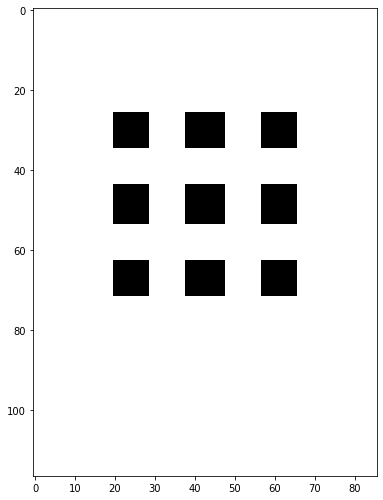

In [385]:
data = cellBoolArray.reshape(dimCells,  order='F')
data = data[:, :, 0]
print(data.shape)
plt.figure(figsize=(dimCells[0]/10, dimCells[1]/10))
plt.imshow(data, interpolation='none', cmap='gray')

## Represent for z=0 VTK values in the snapshot

In [431]:
ds = np.load("/scratch/siserte/ainaV2/case2.npz")
ds = ds.f.data
ds.shape
dimCells = ds.shape[1:-1]

(807, 117, 86, 38, 3)

In [445]:
ts = 80
dsts = np.array(ds[ts, :, :, :, 0], copy=True)
print(dsts.shape)
dsts = dsts.reshape(-1)
print(dsts.shape)

(117, 86, 38)
(382356,)


(382356,)
(117, 86, 38)
(382356,)
(117, 86)


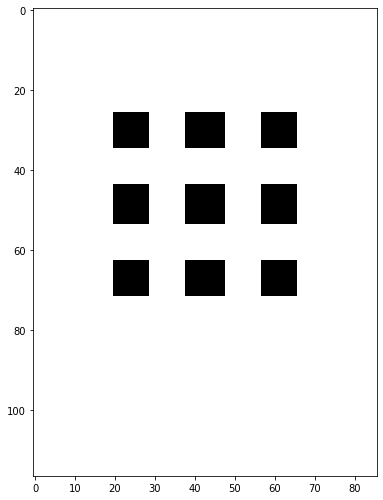

In [434]:
#Reshape building cells to C shape
print(cellBoolArray.shape)
buildingCells = cellBoolArray.reshape(dimCells,  order='F')
print(buildingCells.shape)
buildingCells = buildingCells.reshape(-1,  order='C')
print(buildingCells.shape)
data = buildingCells.reshape(dimCells,  order='C')
data = data[:, :, 0]
print(data.shape)
plt.figure(figsize=(dimCells[0]/10, dimCells[1]/10))
plt.imshow(data, interpolation='none', cmap='gray')

(117, 86)


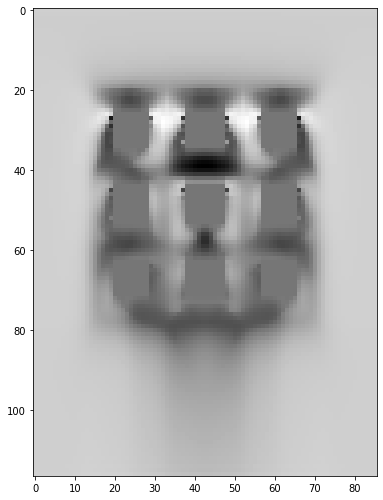

In [446]:
data = dsts.reshape(dimCells,  order='C')
data = data[:, :, 0]
print(data.shape)
plt.figure(figsize=(dimCells[0]/10, dimCells[1]/10))
plt.imshow(data, interpolation='none', cmap='gray')

(117, 86)


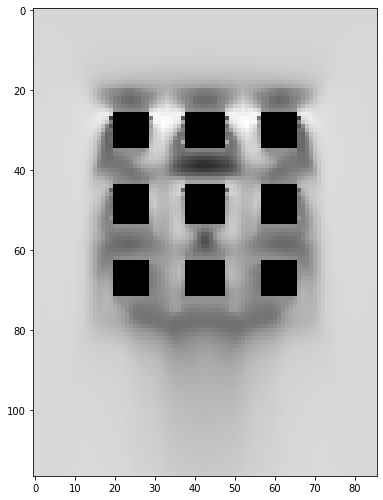

In [452]:
for idx, cell in enumerate(buildingCells):
    if not cell:
        dsts[idx] = -2
data = dsts.reshape(dimCells,  order='C')
data = data[:, :, 0]
print(data.shape)
plt.figure(figsize=(dimCells[0]/10, dimCells[1]/10))
plt.imshow(data, interpolation='none', cmap='gray')